In [16]:
import os
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
import numpy as np
import pandas as pd

In [17]:
true_path = './FDM/range[0,1]/'
file_names = ['u1_output.csv','u2_output.csv','u3_output.csv','u4_output.csv','u5_output.csv','u6_output.csv']
true_data = [pd.read_csv(true_path + file_name,header=None) for file_name in file_names]

result_fdm = true_data
fdm_date = [fdm.iloc[1:,1:].iloc[::10,::10].values for fdm in result_fdm]
c_a,c_bc,c_c,c_ab,c_abb,c_aab = fdm_date

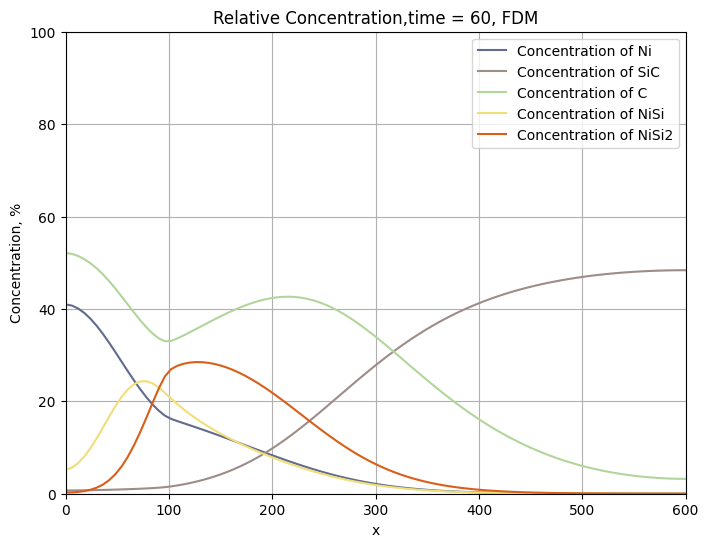

In [18]:
sum = c_a[:,-1] + c_bc[:,-1] + c_c[:,-1] + c_ab[:,-1] + c_abb[:,-1] + c_aab[:,-1]


re_a = c_a[:,-1] / sum * 100
re_bc = c_bc[:,-1] / sum * 100 /2
re_c = c_c[:,-1] / sum * 100
re_ab = c_ab[:,-1] / sum * 100
re_abb = c_abb[:,-1] / sum * 100
re_aab = c_aab[:,-1] / sum * 100


component_x = np.linspace(0, 600, 101)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(component_x, re_a, label=r'Concentration of Ni', color=(97/255,108/255,140/255))
ax.plot(component_x, re_bc, label=r'Concentration of SiC', color=(86/140,140/255,135/255))
ax.plot(component_x, re_c, label=r'Concentration of C', color=(178/255,213/255,155/255))
ax.plot(component_x, re_ab, label=r'Concentration of NiSi', color=(242/255,222/255,121/255))
ax.plot(component_x, re_abb, label=r'Concentration of NiSi2', color=(217/255,95/255,24/255))
ax.set_title(f'Relative Concentration,time = 60, FDM')
ax.set_xlabel('x')
ax.set_ylabel('Concentration, %')
ax.set_xlim([0, 600])
ax.set_ylim([0, 100])
ax.legend()

plt.grid(True)
# plt.savefig(os.path.join(save_path, file_name))
plt.savefig(f'FDM_results.pdf', format="pdf", dpi=600, bbox_inches='tight')
plt.show()